In [7]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

# ML Model Creation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer

import statsmodels.api as sm

current_dir = os.getcwd()
data_fldr = os.path.join(current_dir, "..", "data")
out_dir = os.path.join(current_dir, "..", "data", "output")
# print(current_dir)

# Datasets

In [8]:
coe_df = pd.read_excel(os.path.join(data_fldr, "COE_Export.xlsx"), sheet_name="Yearly")
cpi_df = pd.read_excel(os.path.join(data_fldr, "ConsumerPriceIndex.xlsx"), sheet_name="Consolidate")
ni_df = pd.read_excel(os.path.join(data_fldr, "NationalIncome.xlsx"), sheet_name="Consolidate")
hh_df = pd.read_excel(os.path.join(data_fldr, "Household.xlsx"), sheet_name="Consolidate")
ms_df = pd.read_excel(os.path.join(data_fldr, "MaritalStatus.xlsx"), sheet_name="Consolidate")
pp_df = pd.read_excel(os.path.join(data_fldr, "Population.xlsx"), sheet_name="Consolidate")


In [9]:
# coe_df
# cpi_df

## Choosing of COE Category

In [10]:
coe_cat_df = coe_df.loc[coe_df['Category'] == "A", :]
coe_cat_df

,Year,Category,Value
0,2000,A,38981.083333
5,2001,A,27031.791667
10,2002,A,30831.916667
15,2003,A,28754.875000
20,2004,A,25180.916667
25,2005,A,16550.791667
30,2006,A,11187.166667
35,2007,A,14101.125000
40,2008,A,12330.291667
45,2009,A,11600.041667


## Joining of Datasets

### Full Dataframe

In [11]:
# List of DataFrames
dfs = [coe_cat_df, cpi_df, ni_df, hh_df, ms_df, pp_df]

# Merge DataFrames using functools.reduce()
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Year', how='left'), dfs)
merged_df

,Year,Category,Value,MAS Core Inflation Measure (Index),Residential Properties Price Index,Landed Price Index,Non-Landed Price Index,Per Capita GDP (Dollar),HDB 1- And 2-Room Flats,HDB 3-Room Flats,...,Total Female Malays,Total Chinese,Total Male Chinese,Total Female Chinese,Total Indians,Total Male Indians,Total Female Indians,Total Other Ethnic Groups,Total Males Other Ethnic Groups,Total Females Other Ethnic Groups
0,2000,A,38981.083333,73.818,97.950,99.350,97.700,41121.0,45600.0,235700.0,...,226357.0,2513847.0,1249662.0,1264185.0,257866.0,134337.0,123529.0,46443.0,21818.0,24625.0
1,2001,A,27031.791667,74.965,88.200,90.575,87.450,38880.0,41800.0,233400.0,...,229818.0,2552077.0,1267019.0,1285058.0,262968.0,136485.0,126483.0,49069.0,23084.0,25985.0
2,2002,A,30831.916667,74.927,82.475,85.225,81.575,39679.0,41400.0,225300.0,...,233284.0,2589525.0,1283362.0,1306163.0,271923.0,140768.0,131155.0,53136.0,25089.0,28047.0
3,2003,A,28754.875000,75.631,81.000,83.625,80.150,41343.0,44200.0,225800.0,...,234194.0,2572607.0,1273256.0,1299351.0,269899.0,138642.0,131257.0,54594.0,25906.0,28688.0
4,2004,A,25180.916667,77.135,80.675,83.150,79.975,46664.0,41200.0,224700.0,...,237453.0,2599813.0,1285557.0,1314256.0,278106.0,142754.0,135352.0,59658.0,28484.0,31174.0
5,2005,A,16550.791667,78.104,83.000,84.625,82.700,49867.0,44500.0,211600.0,...,240316.0,2626723.0,1297849.0,1328874.0,291131.0,149621.0,141510.0,69238.0,33263.0,35975.0
6,2006,A,11187.166667,79.445,88.950,88.875,89.175,53655.0,46200.0,229300.0,...,243219.0,2656358.0,1310873.0,1345485.0,303096.0,155938.0,147158.0,80462.0,38672.0,41790.0
7,2007,A,14101.125000,81.195,109.925,103.850,111.575,59429.0,44700.0,221300.0,...,245583.0,2686997.0,1324715.0,1362282.0,313395.0,161484.0,151911.0,92138.0,44309.0,47829.0
8,2008,A,12330.291667,85.802,123.475,115.175,125.400,56607.0,43000.0,223200.0,...,248093.0,2721779.0,1339596.0,1382183.0,323431.0,167149.0,156282.0,102339.0,49230.0,53109.0
9,2009,A,11600.041667,85.783,106.000,105.850,106.050,56619.0,49700.0,226500.0,...,250936.0,2770303.0,1360224.0,1410079.0,343509.0,178129.0,165380.0,120013.0,57264.0,62749.0


### Only race

In [22]:
coe_pp = pd.merge(left=coe_cat_df, right=pp_df, left_on="Year", right_on="Year", how="left")
coe_pp_drop = coe_pp.drop(['Category',], axis=1).drop([24], axis=0).set_index("Year")
# coe_pp_drop = coe_pp_drop.iloc[:, [0, 4,7,10,13]]
coe_pp_drop

# coe_pp_drop.corr()

,Value,Total Residents,Total Male Residents,Total Female Residents,Total Malays,Total Male Malays,Total Female Malays,Total Chinese,Total Male Chinese,Total Female Chinese,Total Indians,Total Male Indians,Total Female Indians,Total Other Ethnic Groups,Total Males Other Ethnic Groups,Total Females Other Ethnic Groups
Year,,,,,,,,,,,,,,,,
2000,38981.083333,3273363.0,1634667.0,1638696.0,455207.0,228850.0,226357.0,2513847.0,1249662.0,1264185.0,257866.0,134337.0,123529.0,46443.0,21818.0,24625.0
2001,27031.791667,3325902.0,1658558.0,1667344.0,461788.0,231970.0,229818.0,2552077.0,1267019.0,1285058.0,262968.0,136485.0,126483.0,49069.0,23084.0,25985.0
2002,30831.916667,3382944.0,1684295.0,1698649.0,468360.0,235076.0,233284.0,2589525.0,1283362.0,1306163.0,271923.0,140768.0,131155.0,53136.0,25089.0,28047.0
2003,28754.875000,3366891.0,1673401.0,1693490.0,469791.0,235597.0,234194.0,2572607.0,1273256.0,1299351.0,269899.0,138642.0,131257.0,54594.0,25906.0,28688.0
2004,25180.916667,3413266.0,1695031.0,1718235.0,475689.0,238236.0,237453.0,2599813.0,1285557.0,1314256.0,278106.0,142754.0,135352.0,59658.0,28484.0,31174.0
2005,16550.791667,3467814.0,1721139.0,1746675.0,480722.0,240406.0,240316.0,2626723.0,1297849.0,1328874.0,291131.0,149621.0,141510.0,69238.0,33263.0,35975.0
2006,11187.166667,3525894.0,1748242.0,1777652.0,485978.0,242759.0,243219.0,2656358.0,1310873.0,1345485.0,303096.0,155938.0,147158.0,80462.0,38672.0,41790.0
2007,14101.125000,3583082.0,1775477.0,1807605.0,490552.0,244969.0,245583.0,2686997.0,1324715.0,1362282.0,313395.0,161484.0,151911.0,92138.0,44309.0,47829.0
2008,12330.291667,3642659.0,1802992.0,1839667.0,495110.0,247017.0,248093.0,2721779.0,1339596.0,1382183.0,323431.0,167149.0,156282.0,102339.0,49230.0,53109.0


# Machine Learning Portion

In [13]:
def log_scale(X):
    return np.log1p(X)

In [14]:
# Initialize FunctionTransformer
transformer = FunctionTransformer(log_scale)

In [55]:
# Step 4: Split your data into training and testing sets
X = coe_pp_drop.drop('Value', axis=1)  # Features
y = coe_pp_drop['Value']  # Target variable

# Calculate the number of rows that correspond to 10% of the dataset
test_size = int(len(X) * 0.20)

# Splitting the data into training and testing sets manually
X_train = X.iloc[:-test_size, :]
X_test = X.iloc[-test_size:, :]
y_train = y.iloc[:-test_size]
y_test = y.iloc[-test_size:]

X_train_log_scaled = transformer.transform(X_train)
# Add a constant to the X_train_log_scaled for the intercept term
X_train_log_scaled_with_const = sm.add_constant(X_train_log_scaled)

# Step 5: Initialize and train your multilinear regression model
model = LinearRegression()
# Fit the linear regression model using statsmodels
model.fit(X_train, y_train)
model_stats = sm.OLS(y_train, X_train_log_scaled_with_const).fit()

# Step 6: Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 11021218743.614498


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [56]:
# Print the summary to see the p-values
print(model_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     70.18
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           0.000449
Time:                        19:56:46   Log-Likelihood:                -169.78
No. Observations:                  20   AIC:                             371.6
Df Residuals:                       4   BIC:                             387.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [57]:
# Step 7: Analyze the coefficients to determine the importance of factors
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
coefficients = coefficients.sort_values(by='coefficient', ascending=False)
print("Coefficients:")
print(coefficients)

Coefficients:
                               feature   coefficient
8                 Total Female Chinese  2.232113e+11
7                   Total Male Chinese  1.519242e+11
11                Total Female Indians  6.018236e+10
5                  Total Female Malays  3.603168e+10
14  Total Females Other Ethnic Groups   3.501450e+10
1                 Total Male Residents  2.790605e+10
0                      Total Residents  6.363794e+09
12          Total Other Ethnic Groups   2.002693e+09
3                         Total Malays  9.855113e+08
10                  Total Male Indians -1.110468e+10
9                        Total Indians -2.316517e+10
4                    Total Male Malays -3.525536e+10
13    Total Males Other Ethnic Groups  -3.627254e+10
2               Total Female Residents -4.338099e+10
6                        Total Chinese -1.861941e+11


In [58]:
y_test

Year
2020    35403.611111
2021    47424.583333
2022    75808.958333
2023    94537.500000
Name: Value, dtype: float64

In [59]:
y_pred_df = pd.DataFrame({"Year": X_test.index, "Value":y_pred}).sort_values("Year").set_index("Year")
y_test_df = y_test.reset_index().sort_values("Year").set_index("Year")
# y_test_df

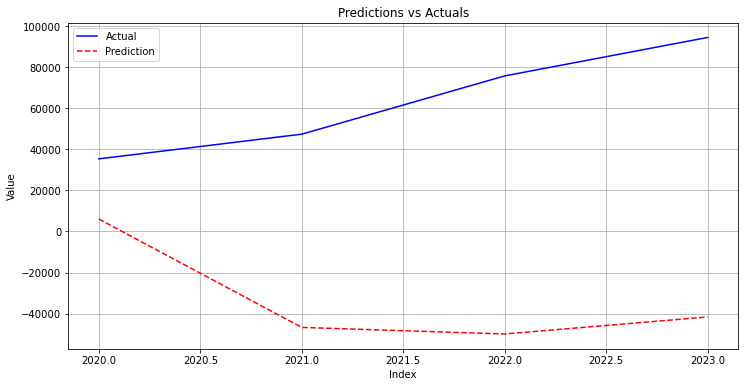

In [60]:
# Plot predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(y_test_df.index, y_test_df['Value'], label='Actual', color='blue')
plt.plot(y_pred_df.index, y_pred_df['Value'], label='Prediction', linestyle='--', color='red')
plt.title('Predictions vs Actuals')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

## Significant Variables

In [70]:
X_train_malay = X_train.loc[:, ['Total Male Malays', 'Total Female Malays']]
X_test_malay = X_test.loc[:, ['Total Male Malays', 'Total Female Malays']]

X_train_log_scaled_malay = transformer.transform(X_train_malay)
# Add a constant to the X_train_log_scaled for the intercept term
X_train_log_scaled_with_const_malay = sm.add_constant(X_train_log_scaled_malay)

# Step 5: Initialize and train your multilinear regression model
model_malay = LinearRegression()
# Fit the linear regression model using statsmodels
model_malay.fit(X_train_malay, y_train)
model_malay_stats = sm.OLS(y_train, X_train_log_scaled_with_const_malay).fit()

# Step 6: Evaluate the model on the test set
y_pred_malay = model_malay.predict(X_test_malay)
mse = mean_squared_error(y_test, y_pred_malay)
print("Mean Squared Error:", mse)

Mean Squared Error: 873253401.5947319


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [73]:
# Print the summary to see the p-values
print(model_malay_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1.979
Date:                Sun, 16 Jun 2024   Prob (F-statistic):              0.169
Time:                        20:06:49   Log-Likelihood:                -223.45
No. Observations:                  20   AIC:                             452.9
Df Residuals:                      17   BIC:                             455.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9.153e+05   3

Therefore Total Female Malay is the strongest indicator, though it is not very significant by itself

In [74]:
y_pred_df = pd.DataFrame({"Year": X_test_malay.index, "Value":y_pred_malay}).sort_values("Year").set_index("Year")
y_test_df = y_test.reset_index().sort_values("Year").set_index("Year")
# y_test_df

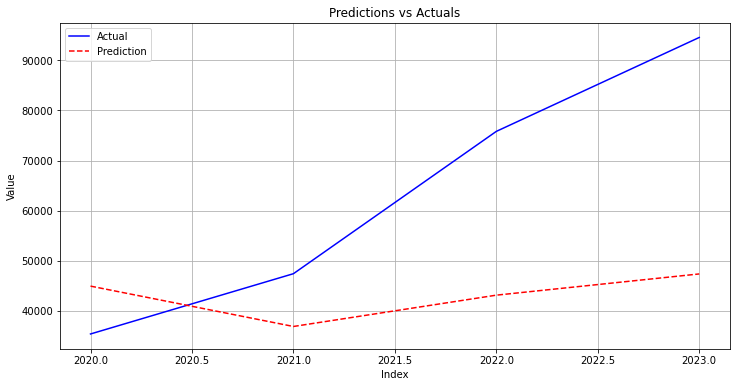

In [75]:
# Plot predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(y_test_df.index, y_test_df['Value'], label='Actual', color='blue')
plt.plot(y_pred_df.index, y_pred_df['Value'], label='Prediction', linestyle='--', color='red')
plt.title('Predictions vs Actuals')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)